In [1]:
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,Group
0,6,148,72,35,0,33.6,0.627,50,1,A
1,1,85,66,29,0,26.6,0.351,31,0,B
2,8,183,64,0,0,23.3,0.672,32,1,C
3,1,89,66,23,94,28.1,0.167,21,0,B
4,0,137,40,35,168,43.1,2.288,33,1,A


In [2]:
diabetes.columns
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree']
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x : (x - x.min()) / (x.max() - x.min()))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,A
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,B
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,C
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,A


In [3]:
import tensorflow as tf

num_preg          = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc       = tf.feature_column.numeric_column('Glucose')
dias_press        = tf.feature_column.numeric_column('BloodPressure')
skin              = tf.feature_column.numeric_column('SkinThickness')
insulin           = tf.feature_column.numeric_column('Insulin')
bmi               = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('DiabetesPedigree')
age               = tf.feature_column.numeric_column('Age')

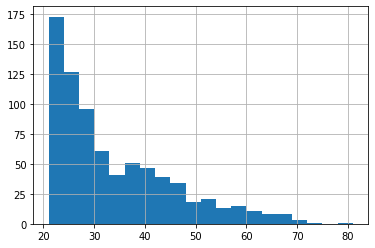

In [4]:
#categorycal features
assigned_group    = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

#converting continous to categorical
import matplotlib.pyplot as plt
%matplotlib inline
diabetes['Age'].hist(bins=20)

In [5]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 70, 80])

#combining all the features
feat_cols = [num_preg, plasma_gluc, dias_press, skin, insulin, bmi, diabetes_pedigree, assigned_group, age_buckets]

#splitting the data
x_data = diabetes.drop('Outcome', axis = 1)
labels = diabetes['Outcome']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.33, random_state = 101)


In [7]:
#applying input function
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x = x_train, y = y_train, batch_size = 10, num_epochs = 500, shuffle = True)

#creating the model
folder = '~/Script/Python/Jupyter/AI - Classification Model - Diabetes/'
model = tf.estimator.LinearClassifier(feature_columns = feat_cols, n_classes = 2, model_dir = folder)
model.train(input_fn = input_func, steps = 500)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '~/Script/Python/Jupyter/AI - Classification Model - Diabetes/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff0b7c75d50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instruction

In [9]:
#prediction
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x = x_test, batch_size = 10, num_epochs = 1, shuffle = False)
predictions     = model.predict(pred_input_func)
list(predictions)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ~/Script/Python/Jupyter/AI - Classification Model - Diabetes/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.19773918], dtype=float32),
  'logistic': array([0.5492743], dtype=float32),
  'probabilities': array([0.45072562, 0.5492744 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.4782589], dtype=float32),
  'logistic': array([0.61733663], dtype=float32),
  'probabilities': array([0.38266328, 0.61733663], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.58619994], dtype=float32),
  'logistic': array([0.35750723], dtype=float32),
  'probabilities': array([0.6424927, 0.3575072], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 

In [10]:
#evaluating the model
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x = x_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False)
results         = model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-15T17:27:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ~/Script/Python/Jupyter/AI - Classification Model - Diabetes/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-09-15-17:27:24
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.6889764, accurac

{'accuracy': 0.6889764,
 'accuracy_baseline': 0.6574803,
 'auc': 0.7544222,
 'auc_precision_recall': 0.6022144,
 'average_loss': 0.5503521,
 'label/mean': 0.34251967,
 'loss': 0.5594036,
 'precision': 0.5588235,
 'prediction/mean': 0.35560313,
 'recall': 0.43678162,
 'global_step': 500}